# Imports

In [1]:
import os
import pydotplus
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from IPython.display import Image

# Load Data

In [2]:
df = pd.read_csv('Data/master_updated.csv', index_col='Unnamed: 0')

drop_cols = ['Total Pop Census', 'People not expected to survive age 40']
X = df.iloc[:, range(42)].drop(drop_cols, axis=1)
X_novacc = df.iloc[:, range(25) + range(38, 42)].drop(drop_cols, axis=1)

# Alcoholism
## Decision Tree Regressor

{'max_depth': 2}
0.440097250354


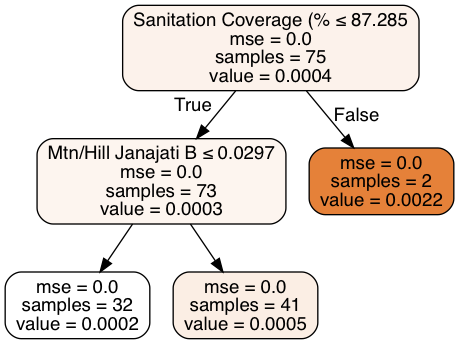

In [3]:
param_grid = {'max_depth': range(2, 10)}

dtr = GridSearchCV(tree.DecisionTreeRegressor(random_state=324), param_grid, n_jobs=4)
dtr.fit(X_novacc, df.Alcoholism)
print dtr.best_params_

dtr = dtr.best_estimator_
print dtr.score(X_novacc, df.Alcoholism)

dot_data = tree.export_graphviz(
    dtr, feature_names=X_novacc.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=300) 

## Random Forest Regressor

In [4]:
rfr = RandomForestRegressor(random_state=324, n_estimators=15)
rfr.fit(X_novacc, df.Alcoholism)
print rfr.score(X_novacc, df.Alcoholism)

features = filter(lambda x: x[1] > 0, 
                  sorted(zip(X_novacc.columns, rfr.feature_importances_),
                         key=lambda x: x[1], reverse=True))
feature_cols = map(lambda x: x[0], features)
features

0.620019517705


[('Adult illiteracy rate', 0.2777905638865415),
 ('Sanitation Coverage (%', 0.19082059676574969),
 ('Hill Brahman', 0.1356349858863565),
 ('Foreigner', 0.067872789881060352),
 ('Mtn/Hill Janajati B', 0.065359327393074804),
 ('Water Coverage Supply (%)', 0.050861865404165957),
 ('Madhesi Other - OC A', 0.039905600938053586),
 ('HPI', 0.028983198911244526),
 ('Mtn/Hill Janajati A', 0.025627415334331483),
 ('Tarai Janajati', 0.024028160163604682),
 ('Other (MPB)', 0.021809984256023231),
 ('Deprivation in economic provisioning', 0.018067157607755357),
 ('Children <5 years malnourished', 0.017069855934919134),
 ('Newar', 0.017044870653446748),
 ('Hill Chhetree', 0.0074678463887960667),
 ('Other undefined', 0.0051853729942104862),
 ('Poverty Gap', 0.0035451628516615513),
 ('Without safe water', 0.0029252447490042961)]

## Create Decision Tree Using Random Forest Feature Importance

0.440097250354


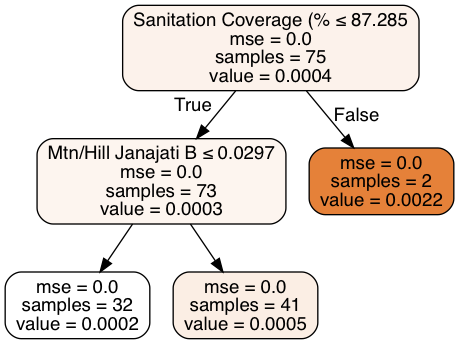

In [5]:
feature_cols = map(lambda x: x[0], filter(lambda x: x[1] > 0., features))
X_featureselection = X[feature_cols]

param_grid = {'max_depth': range(2, 10)}
dtr = GridSearchCV(tree.DecisionTreeRegressor(random_state=324), param_grid, n_jobs=4)
dtr.fit(X_featureselection, df.Alcoholism)

dtr = dtr.best_estimator_
print dtr.score(X_featureselection, df.Alcoholism)

dot_data = tree.export_graphviz(
    dtr, feature_names=X_featureselection.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=300) 

# Depression
## Decision Tree Regressor

{'max_depth': 2}
0.772351358737


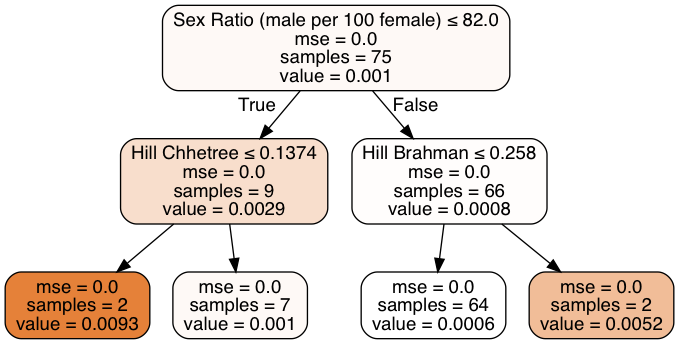

In [6]:
param_grid = {'max_depth': range(2, 20)}

dtr = GridSearchCV(tree.DecisionTreeRegressor(random_state=324), param_grid, n_jobs=4)
dtr.fit(X_novacc, df.Depression)
print dtr.best_params_

dtr = dtr.best_estimator_
print dtr.score(X_novacc, df.Depression)

dot_data = tree.export_graphviz(
    dtr, feature_names=X_novacc.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=300) 

## Random Forest Regressor

In [7]:
rfr = RandomForestRegressor(random_state=324, n_estimators=17)
rfr.fit(X_novacc, df.Depression)
print rfr.score(X_novacc, df.Depression)
dep_pred = rfr.predict(X_novacc)

features = filter(lambda x: x[1] > 0, 
                  sorted(zip(X_novacc.columns, rfr.feature_importances_),
                         key=lambda x: x[1], reverse=True))
feature_cols = map(lambda x: x[0], features)
features

0.820100609182


[('Sex Ratio (male per 100 female)', 0.17127757924652032),
 ('Hill Brahman', 0.1579854010315507),
 ('Madhesi Other - OC B', 0.087049031740916161),
 ('Newar', 0.063441723223853524),
 ('Hill Chhetree', 0.061370204975850412),
 ('Madhesi Other - OC A', 0.053902857974428918),
 ('HPI', 0.047835871571032182),
 ('Without safe water', 0.047223914315202058),
 ('Adult illiteracy rate', 0.040404523860076355),
 ('Sanitation Coverage (%', 0.036126218904488208),
 ('Poverty Incidence', 0.035875070474055026),
 ('Madhesi Brahman/Chhetree', 0.033849024057036513),
 ('Mtn/Hill Janajati A', 0.031840006242102738),
 ('Water Coverage Supply (%)', 0.03085902429676414),
 ('Poverty Gap', 0.027721972834622181),
 ('Mtn/Hill Janajati B', 0.017944615518063482),
 ('Other undefined', 0.013703285844165292),
 ('Tarai Janajati', 0.010633236867220671),
 ('Other (MPB)', 0.0099399157622300071),
 ('HDI ', 0.0081934391667273093),
 ('Madhesi Dalit', 0.0038672126290315682),
 ('Hill Dalit', 0.0028688311196439146),
 ('Children <5 

## Create Decision Tree Using Random Forest Feature Importance

0.829397114518


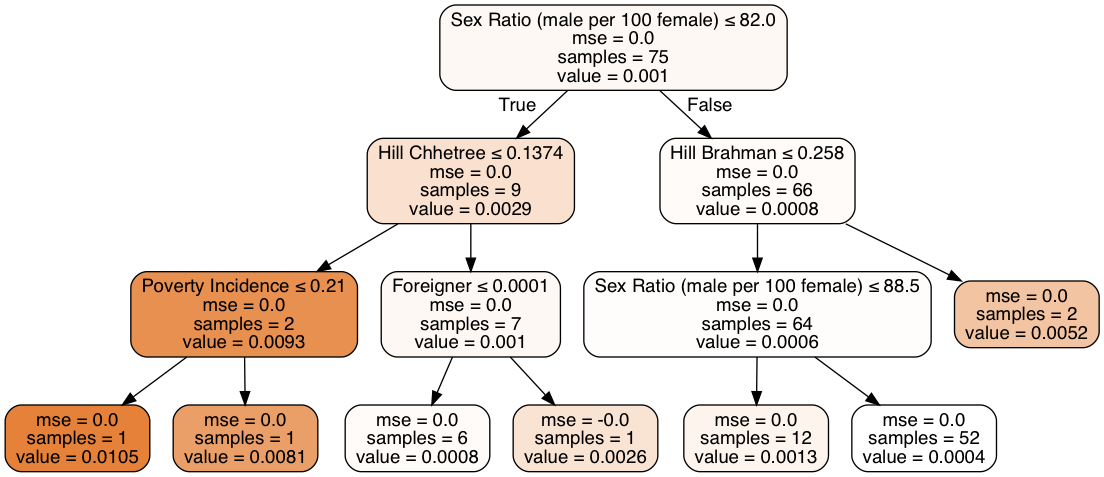

In [8]:
feature_cols = map(lambda x: x[0], filter(lambda x: x[1] > 0., features))
X_featureselection = X[feature_cols]

param_grid = {'max_depth': range(2, 20)}
dtr = GridSearchCV(tree.DecisionTreeRegressor(random_state=324), param_grid, n_jobs=4)
dtr.fit(X_featureselection, df.Depression)

dtr = dtr.best_estimator_
print dtr.score(X_featureselection, df.Depression)

dot_data = tree.export_graphviz(
    dtr, feature_names=X_featureselection.columns, out_file=None, filled=True, rounded=True, special_characters=True,)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=600) 